In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv')
df.head(5)

,Month,Tourist Arrival,CCI,PMI,REERI,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
0,01/01/2008,399556,98,53,109,11,59,32,8,58,...,27,58,29,18,20,0,32,0,8,Train
1,01/02/2008,411032,91,53,108,0,51,0,0,46,...,27,58,31,10,19,5,39,7,5,Train
2,01/03/2008,414332,90,53,106,0,57,7,24,58,...,27,50,29,38,28,6,30,0,0,Train
3,01/04/2008,395900,83,56,106,0,51,6,9,58,...,27,41,30,25,22,8,45,0,8,Train
4,01/05/2008,366387,80,57,106,0,57,0,7,57,...,27,44,24,16,22,5,47,0,9,Train


In [3]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [4]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(test.shape)

(168, 25)
(9, 25)


In [5]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [6]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(168, 23)
(168, 1)


In [7]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(9, 23)
(9, 1)


In [8]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(9, 23)
(9, 1)


<AxesSubplot:>

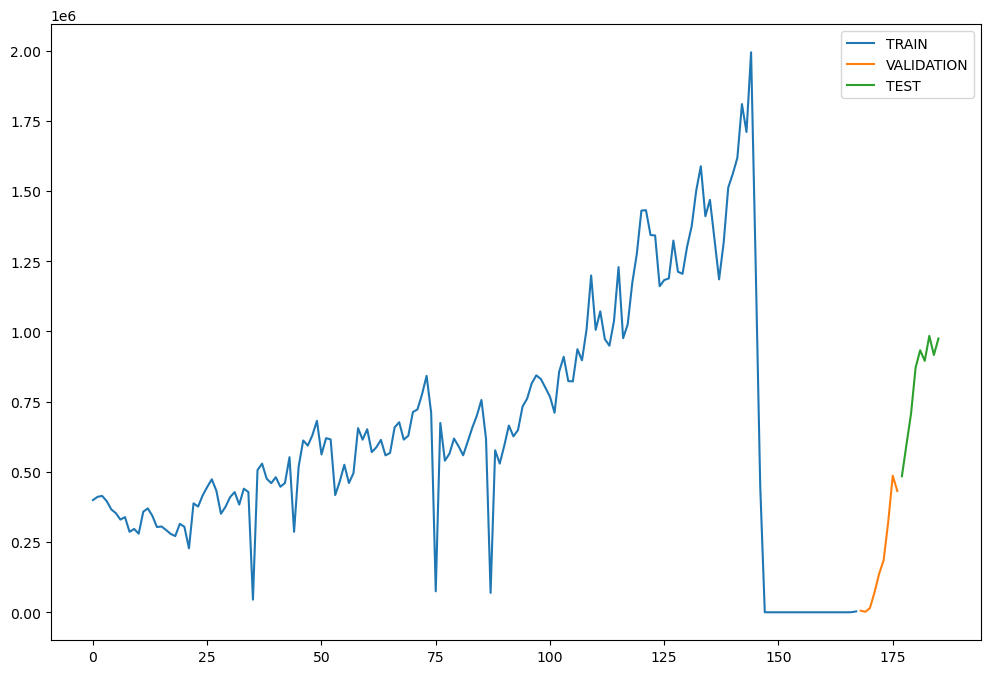

In [9]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 0.0001
model = SimpleExpSmoothing(train['Tourist Arrival']).fit(smoothing_level=alpha)
y_pred = model.forecast(9).rename('SES Forecast')

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 245570.0958844193


In [13]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 222422.9039463581


In [14]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 0.2609613123675708


Text(0.5, 1.0, 'Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Visitor Attention Index + Economic Index - Data Composition 3 (90-5-5)')

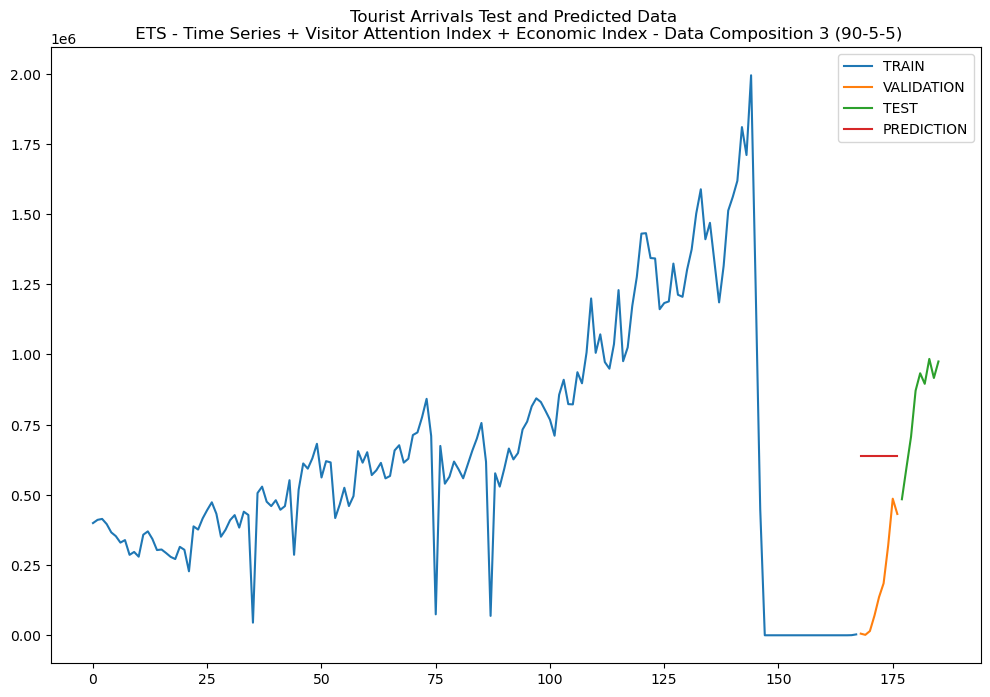

In [15]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))
y_pred.plot(legend=True, label='PREDICTION')
plt.title("Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Visitor Attention Index + Economic Index - Data Composition 3 (90-5-5)")
